In [0]:
from google.colab import files

uploaded = files.upload()

Saving sample.zip to sample.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['sample.zip']), 'r')
data.extractall()

In [0]:
data.printdir()

File Name                                             Modified             Size
101_ObjectCategories/airplanes/                2019-02-21 13:32:32            0
101_ObjectCategories/airplanes/image_0002.jpg  2004-11-09 11:59:06         8181
101_ObjectCategories/airplanes/image_0003.jpg  2004-11-09 11:59:06        11741
101_ObjectCategories/airplanes/image_0004.jpg  2004-11-09 11:58:54        15700
101_ObjectCategories/airplanes/image_0005.jpg  2004-11-09 11:58:54        14356
101_ObjectCategories/airplanes/image_0007.jpg  2004-11-09 11:58:54         9596
101_ObjectCategories/airplanes/image_0008.jpg  2004-11-09 11:58:54        13896
101_ObjectCategories/airplanes/image_0009.jpg  2004-11-09 11:59:06        10865
101_ObjectCategories/airplanes/image_0010.jpg  2004-11-09 11:58:54         8378
101_ObjectCategories/airplanes/image_0011.jpg  2004-11-09 11:58:54        10417
101_ObjectCategories/airplanes/image_0012.jpg  2004-11-09 11:58:54         6418
101_ObjectCategories/airplanes/image_001

In [0]:
import os
train_data_dir = '101_ObjectCategories'  

target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])  

nb_classes = len(target_names)

In [0]:
print('Training a CNN Multi-Classifier Model ......')
print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)
print(' - # of trained samples: ', nb_train_samples)

Training a CNN Multi-Classifier Model ......

 - names of classes:  ['watch', 'stop_sign', 'yin_yang', 'soccer_ball', 'umbrella', 'starfish', 'sunflower', 'airplanes', 'trilobite', 'scorpion'] 
 - # of classes:  10
 - # of trained samples:  1312


In [0]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

import tensorflow as tf
import keras
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras import backend as K  

img_height,img_width=64,64


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (img_height,img_width,3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))


# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.1))


classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.1))



classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.2))
             

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 256, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=10.,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.,
                                    zoom_range=.1,
                                    horizontal_flip=True,
                                    vertical_flip=True,validation_split=0.1)

training_set = train_datagen.flow_from_directory('101_ObjectCategories',classes=
                                                 target_size = (img_width, img_height),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',subset='training')

validation_generator = train_datagen.flow_from_directory('101_ObjectCategories',
                                            target_size = (img_width, img_height),
                                            batch_size = 10,
                                            class_mode = 'categorical',subset='validation')



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(

Found 1185 images belonging to 10 classes.
Found 127 images belonging to 10 classes.


In [0]:
history=classifier.fit_generator(training_set,
                         samples_per_epoch = 1185 ,
                         nb_epoch = 45,
                         validation_data = validation_generator,
                         nb_val_samples = 127 )

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=118, epochs=45, validation_steps=127)`
  """


Epoch 1/45
118/118 [==============================] - 39s 331ms/step - loss: 1.7484 - acc: 0.4864 - val_loss: 1.7991 - val_acc: 0.4529
Epoch 2/45
118/118 [==============================] - 36s 306ms/step - loss: 1.4145 - acc: 0.5517 - val_loss: 1.9881 - val_acc: 0.2847
Epoch 3/45
118/118 [==============================] - 32s 274ms/step - loss: 1.2843 - acc: 0.5966 - val_loss: 1.7418 - val_acc: 0.4355
Epoch 4/45
118/118 [==============================] - 28s 238ms/step - loss: 1.1960 - acc: 0.6195 - val_loss: 1.4596 - val_acc: 0.5718
Epoch 5/45
118/118 [==============================] - 34s 286ms/step - loss: 1.0949 - acc: 0.6602 - val_loss: 1.3992 - val_acc: 0.5817
Epoch 6/45
118/118 [==============================] - 38s 324ms/step - loss: 1.0296 - acc: 0.6780 - val_loss: 1.4016 - val_acc: 0.5500
Epoch 7/45
118/118 [==============================] - 36s 308ms/step - loss: 0.9212 - acc: 0.7085 - val_loss: 1.3400 - val_acc: 0.5685
Epoch 8/45
118/118 [==============================] - 2

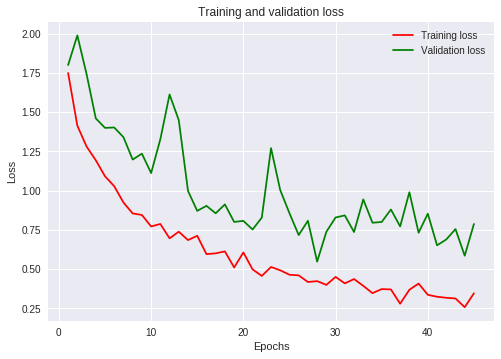

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

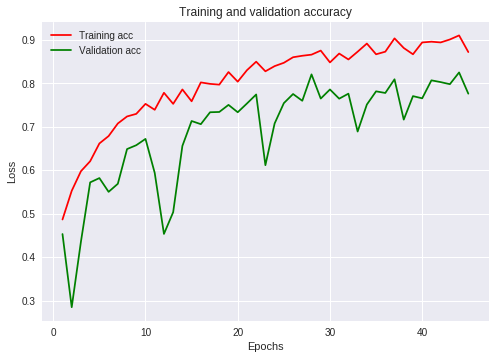

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [0]:
!ls

101_ObjectCategories  final  final.zip	sample_data  sample.zip


In [0]:
from google.colab import files

uploaded = files.upload()

Saving aero.jpg to aero.jpg


Predicted image name is:soccer_ball


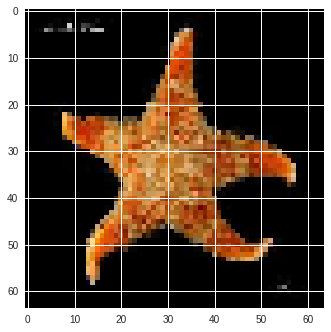

In [0]:
from keras.preprocessing import image
import pandas as pd
import numpy as np
img_path = 'star.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.
plt.imshow(img_tensor[0])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])



classes = classifier.predict_classes(images)
classes=int(classes)
   
print("Predicted image name is:" +target_names[classes])

Predicted image name is: [array([7])]


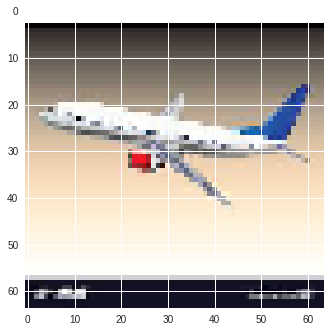

In [0]:
img_path = 'aero.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.
plt.imshow(img_tensor[0])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])



classes = classifier.predict_classes(images)

   
print("Predicted image name is:",[classes])

In [0]:
model_json = classifier.to_json()

In [0]:
with open("model10.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
classifier.save_weights("model10.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
!ls



101_ObjectCategories  final	 model10.h5    sample_data  star.jpg
aero.jpg	      final.zip  model10.json  sample.zip


In [0]:
print('hello')

hello


In [0]:
label_map = (classifier.class_indices)

AttributeError: ignored

In [0]:
response=np.array_str(np.argmax(classes))

TypeError: ignored

In [0]:
from keras.utils.np_utils import to_categorical
y_classes = keras.np_utils.probas_to_classes(y_proba)

AttributeError: ignored

In [0]:
y_true_labels = classifier.classes

AttributeError: ignored

In [0]:
type(target_names)

list

In [0]:
type(classes)

numpy.ndarray

In [0]:
classes=classes.flatten('F')
print(classes)

[7]


In [0]:
for i in classes:
  print(i)


7


In [0]:
target_name=['watch', 'stop_sign', 'yin_yang', 'soccer_ball', 'umbrella', 'starfish', 'sunflower', 'airplanes', 'trilobite', 'scorpion']

In [0]:
target_name[classes]

TypeError: ignored

In [0]:
work=[[1,2,3,4,5,6]]

In [0]:
type(work)

list

In [0]:
!ls

sample_data
